# REPORT TO THE BANK'S LENDING DEPARTMENT


## What is related to paying the loan on time?<a id='guia'></a>


## 4 hypotheses : 
- number of children
- marital status
- income level
- purposes of the loan

verification: [desc](#verif)

In [171]:
import pandas as pd

In [172]:
df = pd.read_csv('../datasets/credit_scoring_eng.csv')
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding
...,...,...,...,...,...,...,...,...,...,...,...,...
21520,1,-4529.316663,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions
21521,0,343937.404131,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car
21522,1,-2113.346888,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property
21523,3,-3112.481705,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car


## Task 1. Data exploration

**Description of the data**
- `children` - the number of children in the household
- `days_employed` - work experience in days
- `dob_years` - age of client in years
- `education` - client's education
- `education_id` - education identifier
- `family_status` - client's marital status
- `family_status_id` - marital status identifier
- `gender` - gender of client
- `income_type` - type of employment
- `debt` - was there any debt on the loan payment
- total_income` - monthly income
- `purpose` - the purpose of getting a loan


In [173]:
df.shape
print(df.dtypes)

children              int64
days_employed       float64
dob_years             int64
education            object
education_id          int64
family_status        object
family_status_id      int64
gender               object
income_type          object
debt                  int64
total_income        float64
purpose              object
dtype: object


In [174]:
df.head()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house
1,1,-4024.803754,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase
2,0,-5623.422610,33,Secondary Education,1,married,0,M,employee,0,23341.752,purchase of the house
3,3,-4124.747207,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education
4,0,340266.072047,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding


- it seems to have problematic values (absence, implicit duplicates and wrong types)

In [175]:
df.info

<bound method DataFrame.info of        children  days_employed  dob_years            education  education_id  \
0             1   -8437.673028         42    bachelor's degree             0   
1             1   -4024.803754         36  secondary education             1   
2             0   -5623.422610         33  Secondary Education             1   
3             3   -4124.747207         32  secondary education             1   
4             0  340266.072047         53  secondary education             1   
...         ...            ...        ...                  ...           ...   
21520         1   -4529.316663         43  secondary education             1   
21521         0  343937.404131         67  secondary education             1   
21522         1   -2113.346888         38  secondary education             1   
21523         3   -3112.481705         38  secondary education             1   
21524         2   -1984.507589         40  secondary education             1   

       

- there are only 2 columns with absent values, both related to job

In [176]:
print(df.isna().sum())

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64


- it seems to have simetry in absenses, ill check:

In [177]:
filtered = df[df.loc[:, 'days_employed'].isna()]
print(filtered[filtered.loc[:, 'total_income'].isna()])
filtered.shape

       children  days_employed  dob_years            education  education_id  \
12            0            NaN         65  secondary education             1   
26            0            NaN         41  secondary education             1   
29            0            NaN         63  secondary education             1   
41            0            NaN         50  secondary education             1   
55            0            NaN         54  secondary education             1   
...         ...            ...        ...                  ...           ...   
21489         2            NaN         47  Secondary Education             1   
21495         1            NaN         50  secondary education             1   
21497         0            NaN         48    BACHELOR'S DEGREE             0   
21502         1            NaN         42  secondary education             1   
21510         2            NaN         28  secondary education             1   

           family_status  family_status

(2174, 12)

- surely there's a simetry, and these lines corespond to 10% of total clients

**what characteristic may have generated this symmetry? evaluating the distribution:**
- it is possible that there is no pattern related to other columns, as seen above.

There is also an analysis comparing the complete data table with the one filtered by the absentees:


In [178]:
# verifying the distribution comparin with the whole dataframe
for item in df.columns:
    print(item.upper())  
    print((df[item].value_counts(normalize=True) * 100).sort_values(ascending=False))

    print(item.upper())
    print((filtered[item].value_counts(normalize=True) * 100).sort_values(ascending=False))

CHILDREN
 0     65.732869
 1     22.383275
 2      9.547038
 3      1.533101
 20     0.353078
-1      0.218351
 4      0.190476
 5      0.041812
Name: children, dtype: float64
CHILDREN
 0     66.191352
 1     21.849126
 2      9.383625
 3      1.655934
 20     0.413983
 4      0.321987
-1      0.137994
 5      0.045998
Name: children, dtype: float64
DAYS_EMPLOYED
-8437.673028      0.005168
 400281.136913    0.005168
-4124.747207      0.005168
 340266.072047    0.005168
-926.185831       0.005168
                    ...   
 343937.404131    0.005168
-2113.346888      0.005168
-3112.481705      0.005168
-79.832064        0.005168
-1984.507589      0.005168
Name: days_employed, Length: 19351, dtype: float64
DAYS_EMPLOYED
Series([], Name: days_employed, dtype: float64)
DOB_YEARS
35    2.866434
40    2.829268
41    2.819977
34    2.801394
38    2.778165
42    2.773519
33    2.699187
39    2.662021
31    2.601626
36    2.578397
44    2.541231
29    2.531940
30    2.508711
48    2.499419
37  

- The distribution in the original data set is similar to the one in the filtered table (no pattern found)

## Intermediate Conclusion
considering the [hypotheses](#guidance) you wish to test, the reason(s) for the symmetric absence of the columns 'days_employed' and 'total_income' is irrelevant, but possible reasons are: never having worked, opting for secrecy with employment related data, has an informal or illegal job, among others, and may also be a technical error.

### missing and negative values are solved with the fill-ins and corrections below:

In [179]:
# correcting the days_employed column

# median considering groups:
# age grouping
labels = ['young', 'mid', 'old']
bins = ['18', '30', '60', float('inf')]
df['age_group'] = pd.cut( df['dob_years'], bins=bins, labels=labels)

df['days_employed'] = df['days_employed'].apply(lambda x: int(abs(x)) if isinstance(x, float) and x < 0 else x)


for row in df['days_employed'].index:
    if ((df.loc[row, 'days_employed'] > 0) == False):
        if (df.loc[row, 'age_group'] == 'young'):
            group_med = df[df['age_group'] == 'young']['days_employed'].median()

        elif (df.loc[row, 'age_group'] == 'mid'):
            group_med = df[df['age_group'] == 'mid']['days_employed'].median()
         
        elif (df.loc[row, 'age_group'] == 'old'):
            group_med = df[df['age_group'] == 'old']['days_employed'].median()
            
        df.loc[row, 'days_employed'] = group_med
        
        

In [180]:
print(df.isna().sum()) 

print(df['total_income'].min())
print(df['days_employed'].min())

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
age_group            101
dtype: int64
3306.762
24.0


## Data Transformation

- 1. resolving implicit and explicit duplicates
- 2. examining each column to see possible problems


 execution:

In [181]:
df['education'].value_counts()

secondary education    13750
bachelor's degree       4718
SECONDARY EDUCATION      772
Secondary Education      711
some college             668
BACHELOR'S DEGREE        274
Bachelor's Degree        268
primary education        250
Some College              47
SOME COLLEGE              29
PRIMARY EDUCATION         17
Primary Education         15
graduate degree            4
Graduate Degree            1
GRADUATE DEGREE            1
Name: education, dtype: int64

In [182]:
df['education'].isna().sum()

0

**standard:** secondary education, graduate, primary education

In [183]:
pivot = pd.pivot_table(df, values='education', columns='education_id', aggfunc='count')
print(pivot)

education_id     0      1    2    3  4
education     5260  15233  744  282  6


In [184]:
df['education'].unique()

array(["bachelor's degree", 'secondary education', 'Secondary Education',
       'SECONDARY EDUCATION', "BACHELOR'S DEGREE", 'some college',
       'primary education', "Bachelor's Degree", 'SOME COLLEGE',
       'Some College', 'PRIMARY EDUCATION', 'Primary Education',
       'Graduate Degree', 'GRADUATE DEGREE', 'graduate degree'],
      dtype=object)

id's and the educations: 

0 bachelors
1 secundary
2 primary
3 college
4 graduate

In [185]:
df['education'] = df['education'].str.lower()
print(df['education'].value_counts())

secondary education    15233
bachelor's degree       5260
some college             744
primary education        282
graduate degree            6
Name: education, dtype: int64


In [186]:
print(df['children'].value_counts())

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64


I notice that there are problems given in the *children* column:
- negative value
- outlier value

solutions (respectively):
- replace by 0
- replace by median 

In [187]:
df.loc[(df['children'] == 20) | (df['children'] < 0), 'children'] = df['children'].median()


In [188]:
print(df['children'].value_counts())

0    14272
1     4818
2     2055
3      330
4       41
5        9
Name: children, dtype: int64


 `days_employed`:

In [189]:
print(df['days_employed'].dtype)

float64


In [190]:
df['days_employed'] = df['days_employed'].astype(int)
print(df['days_employed'].dtype)

int32


In [191]:
print(df['dob_years'].agg(['max', 'min', 'mean']))

max     75.00000
min      0.00000
mean    43.29338
Name: dob_years, dtype: float64


In [192]:
df['dob_years'] = df['dob_years'].astype(int)
print((df[df['dob_years'] == 0]['dob_years'].count() / df['dob_years'].count()) * 100)
print(df['dob_years'].median())

0.4692218350754936
42.0


**0.4%**
replacing or deleting will change the total data very little.
i decide to delete them

In [193]:
print(df.shape)
df.drop(df[df['dob_years'] == 0].index, inplace=True)
print(df.shape)

(21525, 13)
(21424, 13)


`family_status`

In [194]:
print(df['family_status'].value_counts())


married              12331
civil partnership     4156
unmarried             2797
divorced              1185
widow / widower        955
Name: family_status, dtype: int64


In [195]:
print(pd.pivot_table(df, values='family_status', columns='family_status_id', aggfunc='count'))


family_status_id      0     1    2     3     4
family_status     12331  4156  955  1185  2797


- the id's seem aligned to the status
- considering [hypothesis 2](#guidance) , a new column (married-bool) is relevant:

In [196]:
df['marriage'] = df['family_status_id'].apply(lambda x: True if ((x == 0) or (x==1)) else False)
print(df['marriage'].value_counts())

True     16487
False     4937
Name: marriage, dtype: int64


In [197]:
df.isna().sum()

children               0
days_employed          0
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2164
purpose                0
age_group              0
marriage               0
dtype: int64

- now checking 'gender', column 7 of the 12:

In [198]:
df['gender'].value_counts()

F      14164
M       7259
XNA        1
Name: gender, dtype: int64

In [199]:
df = df.drop(df[df['gender'] == 'XNA'].index).reset_index(drop=True)
df['gender'].value_counts()


F    14164
M     7259
Name: gender, dtype: int64

`income_type`:

In [200]:
#df['income_type'].info()
df['income_type'].value_counts()

employee                       11064
business                        5064
retiree                         3836
civil servant                   1453
unemployed                         2
entrepreneur                       2
student                            1
paternity / maternity leave        1
Name: income_type, dtype: int64

- anythin to change

verifying explicit duplicates:

In [201]:
for item in df.columns:
    print(df[item].unique())

[1 0 3 2 4 5]
[  8437   4024   5623 ... 362161 373995 343937]
[42 36 33 32 53 27 43 50 35 41 40 65 54 56 26 48 24 21 57 67 28 63 62 47
 34 68 25 31 30 20 49 37 45 61 64 44 52 46 23 38 39 51 59 29 60 55 58 71
 22 73 66 69 19 72 70 74 75]
["bachelor's degree" 'secondary education' 'some college'
 'primary education' 'graduate degree']
[0 1 2 3 4]
['married' 'civil partnership' 'widow / widower' 'divorced' 'unmarried']
[0 1 2 3 4]
['F' 'M']
['employee' 'retiree' 'business' 'civil servant' 'unemployed'
 'entrepreneur' 'student' 'paternity / maternity leave']
[0 1]
[40620.102 17932.802 23341.752 ... 14347.61  39054.888 13127.587]
['purchase of the house' 'car purchase' 'supplementary education'
 'to have a wedding' 'housing transactions' 'education' 'having a wedding'
 'purchase of the house for my family' 'buy real estate'
 'buy commercial real estate' 'buy residential real estate'
 'construction of own property' 'property' 'building a property'
 'buying a second-hand car' 'buying my own c

In [202]:
df.duplicated().sum()

71

In [203]:
df = df.drop_duplicates().reset_index(drop=True)

In [204]:
df.duplicated().sum()

0

In [205]:
df

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,marriage
0,1,8437,42,bachelor's degree,0,married,0,F,employee,0,40620.102,purchase of the house,mid,True
1,1,4024,36,secondary education,1,married,0,F,employee,0,17932.802,car purchase,mid,True
2,0,5623,33,secondary education,1,married,0,M,employee,0,23341.752,purchase of the house,mid,True
3,3,4124,32,secondary education,1,married,0,M,employee,0,42820.568,supplementary education,mid,True
4,0,340266,53,secondary education,1,civil partnership,1,F,retiree,0,25378.572,to have a wedding,mid,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21347,1,4529,43,secondary education,1,civil partnership,1,F,business,0,35966.698,housing transactions,mid,True
21348,0,343937,67,secondary education,1,married,0,F,retiree,0,24959.969,purchase of a car,old,True
21349,1,2113,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,mid,True
21350,3,3112,38,secondary education,1,married,0,M,employee,1,39054.888,buying my own car,mid,True


**missing values in 'total_income':**
- fill in according to median age category.

In [206]:
print(df['age_group'].value_counts())

mid      15510
young     3716
old       2126
Name: age_group, dtype: int64


**filling of absentees in 'total_income' according to the median of the age group they belong to:**
- reason: median avoids inaccuracies caused by outliers

In [207]:
for row in df['total_income'].index:
    if ((df.loc[row, 'total_income'] > 0) == False):
        if (df.loc[row, 'age_group'] == 'young'):
            group_med = df[df['age_group'] == 'young']['total_income'].median()

        elif (df.loc[row, 'age_group'] == 'mid'):
            group_med = df[df['age_group'] == 'mid']['total_income'].median()
         
        elif (df.loc[row, 'age_group'] == 'old'):
            group_med = df[df['age_group'] == 'old']['total_income'].median()
            
        df.loc[row, 'total_income'] = group_med
        

In [208]:
print(df.isna().sum())
df.shape

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
age_group           0
marriage            0
dtype: int64


(21352, 14)

In [209]:
# See median income values based on your identified factors
print(df.groupby('age_group')['total_income'].median())

age_group
young    22955.474
mid      23832.986
old      19637.056
Name: total_income, dtype: float64


function that calculates averages or medians:

function that calculates averages or medians:**creating a categorized table**
- I believe it is easier to group values and see statistics with values grouped this way:


In [210]:
cat = pd.DataFrame(data=df, columns=['debt', 'children', 'education', 'total_income', 'purpose', 'age_group', 'marriage'])
cat

,debt,children,education,total_income,purpose,age_group,marriage
0,0,1,bachelor's degree,40620.102,purchase of the house,mid,True
1,0,1,secondary education,17932.802,car purchase,mid,True
2,0,0,secondary education,23341.752,purchase of the house,mid,True
3,0,3,secondary education,42820.568,supplementary education,mid,True
4,0,0,secondary education,25378.572,to have a wedding,mid,True
...,...,...,...,...,...,...,...
21347,0,1,secondary education,35966.698,housing transactions,mid,True
21348,0,0,secondary education,24959.969,purchase of a car,old,True
21349,1,1,secondary education,14347.610,property,mid,True
21350,1,3,secondary education,39054.888,buying my own car,mid,True


In [211]:
cat.nunique()

debt                2
children            6
education           5
total_income    19256
purpose            38
age_group           3
marriage            2
dtype: int64

In [212]:
cat.columns

Index(['debt', 'children', 'education', 'total_income', 'purpose', 'age_group',
       'marriage'],
      dtype='object')

## Verifying [hypotheses](#guia) <a id='verif'></a>


**Is there a correlation between income level and on-time payment?**

In [213]:
q1 = df['total_income'].quantile(0.25)
q2 = df['total_income'].quantile(0.50)
q3 = df['total_income'].quantile(0.75)

categoria1 = 'baixo'
categoria2 = 'médio'
categoria3 = 'alto'

for i in range(len(df)):
    if df.loc[i, 'total_income'] <= q1:
        df.loc[i, 'income_cat'] = categoria1
    elif df.loc[i, 'total_income'] <= q2:
        df.loc[i, 'income_cat'] = categoria2
    else:
        df.loc[i, 'income_cat'] = categoria3


In [224]:
tmp = df[df['debt'] == 1]
tmp

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose,age_group,marriage,income_cat
14,0,1844,56,bachelor's degree,0,civil partnership,1,F,business,1,26420.466,buy residential real estate,mid,True,alto
32,0,4649,34,secondary education,1,civil partnership,1,F,employee,1,22249.194,having a wedding,mid,True,médio
38,0,597,25,bachelor's degree,0,unmarried,4,M,employee,1,30759.568,education,young,False,alto
55,0,2355,54,secondary education,1,civil partnership,1,F,retiree,1,23832.986,to have a wedding,mid,True,médio
75,1,2953,38,secondary education,1,married,0,M,employee,1,13109.661,real estate transactions,mid,True,baixo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21321,0,960,39,secondary education,1,civil partnership,1,M,business,1,28219.135,supplementary education,mid,True,alto
21338,0,612,29,bachelor's degree,0,civil partnership,1,F,employee,1,22410.956,buying property for renting out,young,True,médio
21342,1,467,28,secondary education,1,married,0,F,employee,1,17517.812,to become educated,young,True,médio
21349,1,2113,38,secondary education,1,civil partnership,1,M,employee,1,14347.610,property,mid,True,baixo


<AxesSubplot:>

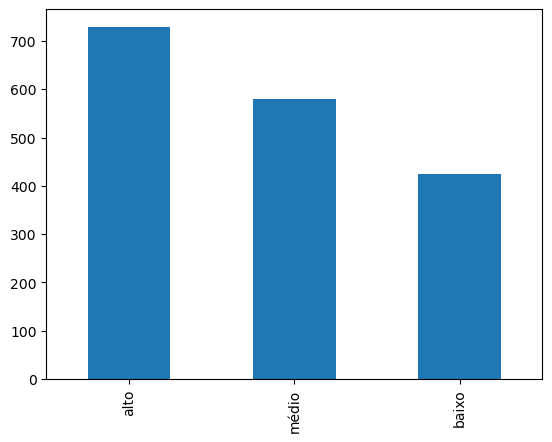

In [225]:
tmp['income_cat'].value_counts().plot(kind='bar')

**Conclusion**

- a certain tendency is observed that the lower the financial level, the more prone to delay in loan repayment

In [226]:
print(df.head(4))
print('---'*25)
print(cat.head(4))

   children  days_employed  dob_years            education  education_id  \
0         1           8437         42    bachelor's degree             0   
1         1           4024         36  secondary education             1   
2         0           5623         33  secondary education             1   
3         3           4124         32  secondary education             1   

  family_status  family_status_id gender income_type  debt  total_income  \
0       married                 0      F    employee     0     40620.102   
1       married                 0      F    employee     0     17932.802   
2       married                 0      M    employee     0     23341.752   
3       married                 0      M    employee     0     42820.568   

                   purpose age_group  marriage income_cat  
0    purchase of the house       mid      True       alto  
1             car purchase       mid      True      médio  
2    purchase of the house       mid      True      médio 

In [227]:
cat['income_cat'] = df['income_cat']
cat['education'] = df['education_id']
cat.rename({'education': 'education_id'}, axis=1)
cat['family_status_id'] = df['family_status_id']
cat.columns

Index(['debt', 'children', 'education', 'total_income', 'purpose', 'age_group',
       'marriage', 'income_cat', 'family_status_id'],
      dtype='object')

**Is there a correlation between family status and payment on time?**

In [228]:
pivot = pd.pivot_table(cat, index='marriage', values='debt')
display(pivot)
print((df.loc[df['debt'] == 1, 'debt'].sum() / len(df)) * 100, '%')

,debt
marriage,
False,0.085141
True,0.079968


8.116335706257024 %


In [235]:
import plotly.graph_objs as go

pivot = pd.pivot_table(cat, index='marriage', values='debt', aggfunc='mean')
pivot['debt'] = pivot['debt'] * 100

fig = go.Figure(
    data=[go.Bar(x=pivot.index, y=pivot['debt'], width=0.5)],
    layout=go.Layout(
        title='Porcentagem de indivíduos com dívida por estado civil',
        yaxis=dict(
            tickformat='.1f%%',  # Formatar os ticks do eixo y como porcentagem
            title='Porcentagem de indivíduos com dívida'
        ),
        height=600,
        width=600
    )
)

fig.show()

- 8% of clients are debtors.

Of married people: 7.9% are debtors. Of the single ones: 8.5%.

- as they are very close, I believe that there is no relationship between marital status and late payment in this case

- 8% dos clientes são devedores.

De pessoas casadas: 7,9% são devedores. Dos solteiros: 8.5%.

- Como são muito próximos, creio que não há qualquer relação entre o estado civil e o atraso no pagamento neste caso

In [233]:
for item in range(6):
    taxa = (df.loc[(df['debt'] == 1) & (df['children'] == item), 'debt'].sum()) * 100 / len(df.loc[df['children'] == item])
    print(f'clients with {item} children have a debt-to-income ratio of {taxa:.2f}%') 
    
print()
taxa_devedores = cat.groupby('children')['debt'].mean() * 100

print(taxa_devedores)

clients with 0 children have a debt-to-income ratio of 7.54%
clients with 1 children have a debt-to-income ratio of 9.20%
clients with 2 children have a debt-to-income ratio of 9.51%
clients with 3 children have a debt-to-income ratio of 8.23%
clients with 4 children have a debt-to-income ratio of 9.76%
clients with 5 children have a debt-to-income ratio of 0.00%

children
0    7.544368
1    9.202838
2    9.514468
3    8.231707
4    9.756098
5    0.000000
Name: debt, dtype: float64


In [237]:
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=['0'], y=[7.54], name='0 children'))
fig.add_trace(go.Bar(x=['1'], y=[9.20], name='1 child'))
fig.add_trace(go.Bar(x=['2'], y=[9.51], name='2 children'))
fig.add_trace(go.Bar(x=['3'], y=[8.23], name='3 children'))
fig.add_trace(go.Bar(x=['4'], y=[9.76], name='4 children'))
fig.add_trace(go.Bar(x=['5+'], y=[0], name='5 or more children'))
fig.update_layout(
    yaxis=dict(
        tickformat='.1f%%',
        title='Percentage of individuals'
    ),
    xaxis=dict(
        title='Number of children'
    ),
    height=500
)
fig.show()


In [234]:
print(df.loc[df['children'] == 5, 'debt'].count())

9


**Conclusion**

- the average number of children of people in debt is similar

note: the fact of finding 0% of debtors with 5 children is inconclusive, since they represent only 9 clients

**How does the purpose of the credit affect the default rate?

In [220]:
debt_purpose = pd.pivot_table(cat, index='purpose', values='debt')
display(debt_purpose['debt'].sort_values())

print(df.loc[df['debt'] == 1, 'debt'].sum() * 100 / len(df))

purpose
purchase of my own house                    0.054927
housing renovation                          0.057851
property                                    0.065183
construction of own property                0.066351
buy residential real estate                 0.067993
buy real estate                             0.069692
purchase of the house for my family         0.070644
buy commercial real estate                  0.071429
housing                                     0.071875
education                                   0.072072
housing transactions                        0.072755
purchase of the house                       0.073438
to have a wedding                           0.075000
buying a second-hand car                    0.075314
building a real estate                      0.077295
transactions with my real estate            0.079745
buying property for renting out             0.080123
wedding ceremony                            0.080153
transactions with commercial real esta

8.116335706257026


**Conclusion
- in the reasons with indebtedness above the average there is some representation in sectors related to: car, education, marriage, house.

# General Conclusion 

all your important conclusions that led you to the way the data was processed and analyzed

- The lower the financial level, the more prone to late payment of the loan.

- 8% of clients are borrowers. Of married people: 7.9% are borrowers. Among single people there are 8.5%. Because the values are close, marital status and late payment are not related.

- The average number of children of people in debt is similar, so there is no relationship.

- The reasons: car, education, marriage and house are the ones with the highest rate of debtors.
``

The process of drawing up the conclusions of this report was composed of:
- importing the data and familiarizing with their layout and documentation
- treatment of errors (duplicates, absences, typing)
- grouping and categorizing maneuvers that could better schematize the data to analyze the focus points, in this case the [hypotheses](#guia)